<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Autoencoders. In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on SageMaker, Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a LSTM classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for objective detection
* <a href="#p3">Part 3</a>: Describe the components of an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - RNNs

Use an RNN/LSTM to fit a multi-class classification model on reuters news articles to distinguish topics of articles. The data is already encoded properly for use in an RNN model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [1]:
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

In [2]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [5]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

batch_size = 32
max_features = len(word_index.values()) + 1
maxlen = 200

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)


print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

8982 train sequences
2246 test sequences
Pad sequences (samples x time)
X_train shape: (8982, 200)
X_test shape: (2246, 200)
Build model...
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 128)         3965440   
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 4,107,393
Trainable params: 4,107,393
Non-trainable params: 0
____________________________________

In [6]:
# Compiling the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

print('Train...')

# Fitting the model
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=1,
          validation_data=(X_test, y_test))

# Score and accuracy output
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 8982 samples, validate on 2246 samples
2246/2246 [==============================] - 2s 942us/sample - loss: -62990.3542 - acc: 0.0396
Test score: -62990.354213045415
Test accuracy: 0.039626002


In [ ]:
# The above model gives a whopping.... 4%! Will work on this to improve haha. I did only do one epoch in the interest of time. 

## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

Answer: It is to make sure that every sequence has the same length by padding 0s at the beginning of each list until this is achieved. 

## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

Answer: LSTMs introduce gates that deal with the vanishing gradient issue that RNNs can have. They also have the memory cell structure that maintains information for long periods of time and the gates determine when it comes in, when it's output, and when it's forgotten. 

## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

One example would be text generation. We used this with the works of Shakespeare, but this could be used for any set of text you wish to pass in. For example, if you wanted to take any of the presidential candidates right now and use their words, you could run a model over past speeches and create a new fake one for them based on their previous language. These work well for abstracting language patterns and usage. 

The next example could be language translation. Things like Google translate are probably using (or at least used) something like LSTM or an RNN to translate text into other languages. This example is sort of similar to the previous one and is well-suited to language. 

Another example is handwriting recognition. It may not be the most efficient of models (a CNN might be better now) but you could absolutely use one to recognize handwriting given sets like MNIST. 

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>


In [4]:
# This package is broken at the moment (according to all the threads I found online)
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "lily frog pond", "limit": 1, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = lily frog pond
Evaluating...
Starting Download...

Errors: 0



At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goals* 
- Check for fish or other labels
- Create a matplotlib visualizations of the images and your prediction as the visualization label

### Importing google images into code

In [10]:
import os, sys
img_dir = ".\\data\\"

# Loading in the images to a list
images = [f for f in os.listdir(img_dir) if os.path.isfile(os.path.join(
    img_dir, f)) and f[-3:] == 'jpg']

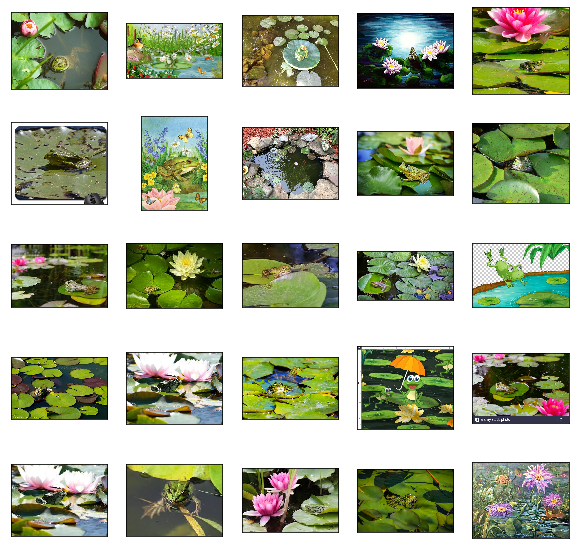

In [13]:
import matplotlib.pyplot as plt
import skimage
from skimage.io import imread

img_list = []
for img in os.listdir(img_dir):
    if img[-3:] == 'jpg':
        img_list.append(skimage.io.imread(f'.\\data\\{img}'))

# Checking to make sure that the images loaded
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_list[i], cmap=plt.cm.binary)
plt.show()

### Building the model 

In [19]:
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

resnet = ResNet50(weights='imagenet', include_top=False)

for layer in resnet.layers:
    layer.trainable = False

x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(resnet.input, predictions)

def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def img_contains_frog(img):
    """ Scans image for Frogs
    
    Should return a boolean (True/False) if a frog is in the image.
    
    Inputs:
    ---------
    img:  Precrossed image ready for prediction. The `process_img_path` function should already be applied to the image. 
    
    Returns: 
    ---------
    frogs (boolean):  TRUE or FALSE - There are frogs in the image.
    
    """

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    model = ResNet50(weights='imagenet')
    features = model.predict(x)
    results = decode_predictions(features, top=3)[0]
    print(results)
    for entry in results:
        if entry[1] == 'bullfrog' or entry[1] == 'tailed_frog' or entry[1] == 'tree_frog':
            print(f'True: {entry[1]} {entry[2]}')
        else:
            pass
    return False

Note: The code below doesn't display "False" when no frogs are detected, but only when I run the images in a loop. Below this you will see a single image that displays it just fine. True shows up in the loop, but for whatever reason, it doesn't show False. 

In [98]:
for img in images:
    print(f'Image: {img}')
    img_contains_frog(process_img_path(f'.\\data\\{img}'))
    print('\n')

Image: 2133862-UWGSJROZ-7.jpg
[('n02165456', 'ladybug', 0.28728867), ('n07745940', 'strawberry', 0.24313514), ('n12267677', 'acorn', 0.10035573)]


Image: 2395842-bigthumbnail.jpg
[('n01558993', 'robin', 0.8017394), ('n01530575', 'brambling', 0.10801282), ('n01833805', 'hummingbird', 0.015188361)]


Image: 51-npJYkfaL._SX466_.jpg
[('n04275548', 'spider_web', 0.33705488), ('n01641577', 'bullfrog', 0.3001321), ('n01737021', 'water_snake', 0.21439739)]
True: bullfrog 0.3001320958137512


Image: 51xoFj7A7NL.jpg
[('n04476259', 'tray', 0.24620067), ('n04522168', 'vase', 0.15228003), ('n02643566', 'lionfish', 0.14575073)]


Image: 5570627-small-frog-on-a-lily-pad-in-a-pond-with-a-blooming-pink-lily-.jpg
[('n03876231', 'paintbrush', 0.113712825), ('n01667778', 'terrapin', 0.10024867), ('n04476259', 'tray', 0.074056186)]


Image: 61sPrlbm8lL._AC_SL1001_.jpg
[('n01641577', 'bullfrog', 0.86470526), ('n01737021', 'water_snake', 0.018312087), ('n01644900', 'tailed_frog', 0.017460223)]
True: bullfro

In [20]:
# Showing 'False' output
img_contains_frog(process_img_path(f'.\\data\\{images[0]}'))

[('n02165456', 'ladybug', 0.28728867), ('n07745940', 'strawberry', 0.24313514), ('n12267677', 'acorn', 0.10035573)]


False

<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

A great example would be using an autoencoder to denoise an image. It would take the image and predict what the values would be in the pixels that are noisy in order to smooth out a picture and make it much cleaner. In other words, it would predict it's own input via the compression then decompression back to the input in the layers. 

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- **What do you consider your strongest area, as a Data Scientist?**<br>
*I believe my strongest area is debugging. I spend a lot of time working on making sure my code is working and I don't stop until it is fixed. I suppose that means perseverance would be my top skill. Aside from that, my actual coding is very clean and labeled well for readability and reproducibility, in my opinion. I feel that's very important.*<br><br>

- **What area of Data Science would you most like to learn more about, and why?**<br>
*I would love to learn more about natural language processing and handwriting recognition. I have some big ideas in terms of apps for educational purposes and I think I'll be spending lots of time diving into those two things to create what I wish I had as a math teacher and teacher in general. (If you're curious what it is, reach out to me!)*<br><br>

- **Where do you think Data Science will be in 5 years?**<br>
*I think AI will be used a WHOLE lot more. At the conference I just attended, one presentation talked about how only about 5% of companies utilize AI properly and about 20% utilize in "semi-ok" ways but don't add a lot of value. That leaves 80% of companies catching up or stuck not knowing how to do so. I think AI is going to be the norm for most companies even more broadly than ML right now (though that will be ubiquitous at pretty much every company, I believe)*<br><br>

- **What are the threats posed by AI to our society?**<br>
*The threats lie in the ethics. It could absolutely be used to profile, discriminate, and cheat in the business and even political world (it probably already is to an extent). I don't think AI overlords are quite a thing in the near future (maybe a century or two down the line!) but in terms of ethics, it's a huge unregulated free-for-all space right now and that's scary but also exciting in terms of the innovation that can come from it.*<br><br>

- **How do you think we can counteract those threats? **<br>
*Something like the hippocratic oath, but for AI engineers and companies utilizing them. We know there are doctors out there abusing their licenses and positions, but by in large they do follow a strict code of conduct. We could implement something like that for AI. Or maybe even create a sort of "board certification" or "bar exam" or something to that extent to create ethical consequences for those that do abuse it. Yes, lawyers abuse their power, but are easily disbarred if they do so. Doctors lose their licenses if they abuse them. This could possibly work for AI.*<br><br>

- **Do you think achieving General Artifical Intelligence is ever possible?**<br>
*I definitely think it's possible, but not for a while, especially in terms of sheer data amounts our brains can currently hold. If hardware gets better faster, yeah, we could get there sooner (I think of the film Ex Machina where the computing hardware in the AI had deep layers and folds like a brain, for instance). *<br><br>

A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [ ]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")